# Image Pre-processing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Image Normalisation

Shape (1092, 728)
Max: 255
Min: 0


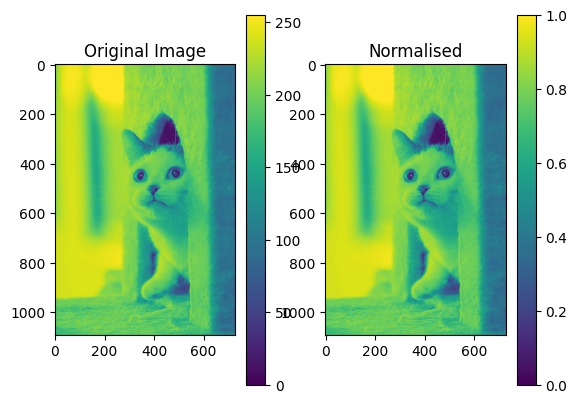

In [ ]:
# Open Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)
print('Shape', img.shape)
print("Max:", np.max(img))
print("Min:", np.min(img))

# Normalise
img_normalise = img / np.max(img)

# Show
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(img_normalise)
plt.title("Normalised")
plt.colorbar()

plt.show()

## Image Standardisation

Mean [[184.65363986]]
STD [[49.26964121]]


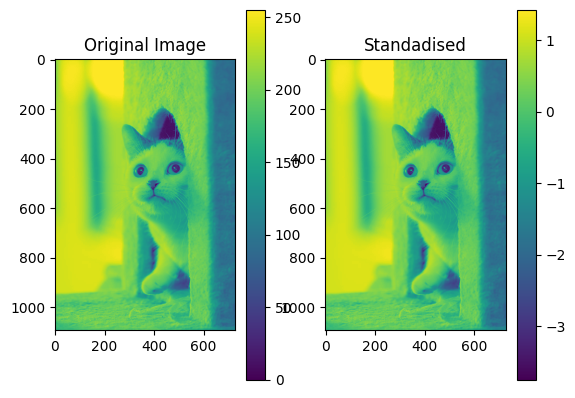

In [ ]:
# Open Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate mean and std deviation
mean, std = cv2.meanStdDev(img)
print("Mean", mean)
print("STD", std)

# Standerdise
img_std = (img - mean) / std

# Show
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(img_std)
plt.title("Standadised")
plt.colorbar()

plt.show()

## Histogram Equalisation

In [ ]:
# Open Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)

# Equalise
img_h_equalise = cv2.equalizeHist(img)

# Save
cv2.imwrite("/content/cat-gray.jpg", img)
cv2.imwrite("/content/cat-h-equalise.jpg", img_h_equalise)


True

# Image Augmentation

## Crop Image

(728, 546)


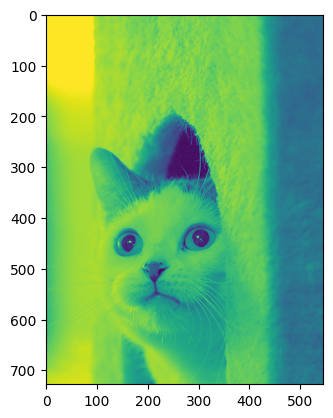

In [ ]:
# Load Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)

# Define crop parameters, left, top, right, bottom
width, height = img.shape
size = min(width, height)
left = int((width - size) / 2)
top = int((height - size) / 2)
right = int((width + size) / 2)
bottom = int((height + size) / 2)


# crop the image
img_cropped = img[top:bottom, left:right]
print(img_cropped.shape)

# show
plt.imshow(img_cropped)

In [ ]:
img.shape

(1092, 728)

In [ ]:
print(left, right, top, bottom)

182 910 0 728


## Flip

In [ ]:
# Load Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)


# Flip - Vertically
img_flip_v = cv2.flip(img, 0)


# Flip - Horizontally
img_flip_h = cv2.flip(img, 1)

# Show
plt.figure()
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_flip_v,cmap='gray')
plt.title("Vertical Flip")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_flip_h,cmap='gray')
plt.title("Horizontal Flip")
plt.axis("off")

plt.show()

## Add Gaussian Noise


In [ ]:
# Load Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)

# Define Gaussian Noise distibution
noise = np.random.random(img.shape)
noise = noise * 100
# Add Noise
img_noise = img + noise


# Show

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_noise,cmap='gray')
plt.title("With Noise")
plt.axis("off")

plt.show()

## Add Salt & Paper Noise

In [ ]:
# Define snadp noise function
def add_sp_noise(img):
  img_size = img.size
  noise_percentage = 0.01
  noise_size = int(noise_percentage*img_size)
  random_indices = np.random.choice(img_size, noise_size)
  img_noised = img.copy()
  noise = np.random.choice([img.min(), img.max()], noise_size)
  img_noised.flat[random_indices] = noise
  return img_noised

# Load Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)

# Add Noise
img_noised = add_sp_noise(img)

# Show

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_noised,cmap='gray')
plt.title("With S&P Noise")
plt.axis("off")

plt.show()


# Image Feature Extraction

## Sobel Edge Detection

In [ ]:
# Edge Detection Function
def sobel_edge_detector(img):

    # Apply Sobel operator
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate gradient magnitude
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Apply a threshold to identify edges
    threshold = 50
    edges = magnitude > threshold

    return edges



# Load Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)

# Detect Edges
edges = sobel_edge_detector(img)

# Show

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges,cmap='gray')
plt.title("Sobel Edges")
plt.axis("off")

plt.show()


## Canny Edge Detection

In [ ]:
# Load Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)

# Detect Edges
img_edges_canny = cv2.Canny(img, 100, 200)

# Show
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_edges_canny,cmap='gray')
plt.title("Canny Edges")
plt.axis("off")

plt.show()


# Filters


## Mean Filter

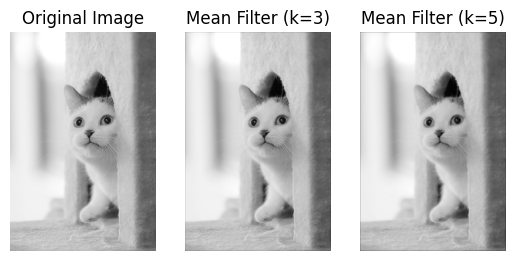

In [ ]:
# Define Mean Filter Function
def mean_filter(image, kernel_size):
    # Pad the image to handle borders using zero-padding
    # This ensures that the filter can be applied to border pixels as well
    padded_image = cv2.copyMakeBorder(image,
                                      kernel_size//2,
                                      kernel_size//2,
                                      kernel_size//2,
                                      kernel_size//2,
                                      cv2.BORDER_CONSTANT)

    # Create an empty image to store the filtered result
    filtered_image = np.zeros_like(image)

    # Iterate over each pixel in the image
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Extract the local window centered at the current pixel
            window = padded_image[y:y+kernel_size, x:x+kernel_size]
            # Calculate the mean value of the window
            mean_value = np.mean(window)
            # Assign the mean value to the corresponding pixel in the filtered image
            filtered_image[y, x] = mean_value

    return filtered_image

# Load Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Mean Filter (k=3)
img_mean_3 = mean_filter(img, 3)

# Apply Mean Filter (k=5)
img_mean_5 = mean_filter(img, 5)

# Show
plt.figure()
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_mean_3,cmap='gray')
plt.title("Mean Filter (k=3)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_mean_5,cmap='gray')
plt.title("Mean Filter (k=5)")
plt.axis("off")

plt.show()



## Gaussian Filter

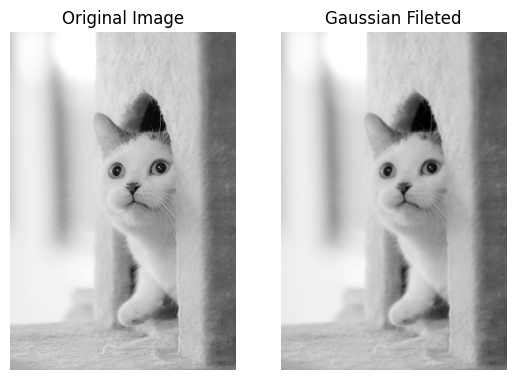

In [ ]:
from scipy.ndimage import convolve

# Get Gaussian Kernel
def gaussian_kernel(size):
   size_x = int(size)
   size_y = int(size)

   x, y = np.mgrid[-size_x:size_x+1, -size_y:size_y+1]

   g = np.exp(-(x**2/float(size_x) + y**2/float(size_y)))
   return g / g.sum()

# Load Image
img = cv2.imread('/content/cat-sample.jpg', cv2.IMREAD_GRAYSCALE)

# Use convolve to apply Gaussian Kernel
img_g_filted = convolve(img, gaussian_kernel(5))

# Show
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_g_filted,cmap='gray')
plt.title("Gaussian Fileted")
plt.axis("off")

plt.show()



---



# Audio Processing

In [ ]:
# Import Librosa
import librosa

## Load a wav file

In [ ]:
# Load Wav File
wav, sr = librosa.load("/content/1_0.wav")

# Get the shape
print("Shape of wav", wav.shape)

# Get the sampling rate
print("SR", sr)

print("Length of wav in seconds ", wav.shape[0]/sr)

Shape of wav (19752,)
SR 22050
Length of wav in seconds  0.8957823129251701


In [ ]:
plt.figure()
plt.plot(wav)
plt.show()

## Fourier Transform

In [ ]:
# Import fft from scipy.fft
from scipy.fft import fft

# Define fft function
def get_fft(audio, sampling_rate) :
  n = len(audio)
  T = 1/sampling_rate
  yf = fft(audio)
  xf = np.linspace(0.0, 1.0/(2.0*T), int(n/2))
  x = xf
  y = 2.0/n * np.abs (yf[:n//2])
  return x,y

## get length of signal
## Get Sampling interval
## Get fft
## create horizontal values (frequency values)
## Get Magnitude values




### Fourier Transform Sin wave (f=3)

In [ ]:
# Create sin wave f=
samples = 100
f = 3
x = np.arange (samples)
y1 = np.sin(2*np.pi*f * (x/samples) )

# Get the fft
x,y = get_fft(y1, 100)


# show
plt.figure()
plt.plot(x,y)
plt.show()

### Fourier Transform sin wave (f=3 + f=11)



In [ ]:
# Create sin wave f=
samples = 100
f = 3
x = np.arange (samples)
y1 = np.sin(2*np.pi*3 * (x/samples) )
y2 = np.sin(2*np.pi*11 * (x/samples) )
y = y1 + y2

# Get the fft
x,y = get_fft(y, 100)


# show
plt.figure()
plt.plot(x,y)
plt.show()

### Get Fourier Transoform of a wav signal

In [ ]:
# Load wav
wav, sr = librosa.load("/content/1_0.wav")

# Get the fft
x,y = get_fft(wav, sr)


# show
plt.figure()
plt.plot(x,y)
plt.show()


## Spectogram


In [ ]:
# Define Spectrogram function
def spectrogram(samples, sample_rate, stride_ms = 10.0,
                          window_ms = 20.0, max_freq = 6000, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples,
                                          shape = nshape, strides = nstrides)

    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]

    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2

    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale

    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])

    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram


In [ ]:
# Load wav
wav, sr = librosa.load("/content/1_0.wav")


# Get Spectrogram
spec = spectrogram(wav, sr)


# Show
plt.figure()
plt.imshow(spec)
plt.colorbar()
plt.show()


### Melspectrogram


In [ ]:
# Load wav
wav, sr = librosa.load("/content/1_0.wav")

# Get Melspectrogram
mel_spec = librosa.feature.melspectrogram(y=wav, sr=sr)

# Show
plt.figure()
plt.imshow(mel_spec)
plt.colorbar()
plt.show()
